# Clustering analysis on 10k PBMC data

In [1]:
from keras.utils.vis_utils import model_to_dot
from keras.utils import normalize, to_categorical
from IPython.display import SVG

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import os

from imp import load_source
from models import *

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

## Adversarial Autoencoder: Basic Architecture

<img src="img/adversarial_autoencoder_model.png" width="800px" style="float:center" >

### Build the model

In [4]:
# Network parameters
parameters = {
    'latent_dim': 10,
    'layers_enc_dim': [200, 100, 50, 30],
    'layers_dec_dim': [30, 50, 100, 200],
    'layers_dis_dim': [200, 100, 50, 30],
    'batch_size': 35,
    'epochs': 200
}

In [5]:
model = AAE1(**parameters)

In [6]:
# Import dataset

data_path = '../data/proc/pbmc10k.h5ad'

model.load_data(data_path)

Dataset imported.


In [7]:
# Rescale gene expression data

model.rescale_data()

Dataset rescaled.


In [8]:
# Build the full model

model.build_model()

In [9]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


,Value,Description
batch_size,35,batch size
epochs,200,number of epochs
alpha,0.1,alpha coeff. in activation function
do_rate,0.1,dropout rate
kernel_initializer,glorot_uniform,kernel initializer of all dense layers
bias_initializer,zeros,bias initializer of all dense layers
l2_weight,None,weight of l2 kernel regularization
l1_weight,None,weight of l1 activity regularization
latent_dim,10,dimension of latent space Z
layer_1_enc_dim,200,dimension of encoder dense layer 1


In [10]:
# Model summary

model.get_summary()


Encoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1789)         0                                            
__________________________________________________________________________________________________
H_1 (Dense)                     (None, 200)          358000      X[0][0]                          
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 200)          800         H_1[0][0]                        
__________________________________________________________________________________________________
LR_1 (LeakyReLU)                (None, 200)          0           BN_1[0][0]                       
____________________________________________________________________________________________

Total params: 805,540
Trainable params: 773,589
Non-trainable params: 31,951
__________________________________________________________________________________________________

Discriminator Network
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Z (InputLayer)               (None, 10)                0         
_________________________________________________________________
H_1 (Dense)                  (None, 200)               2200      
_________________________________________________________________
BN_1 (BatchNormalization)    (None, 200)               800       
_________________________________________________________________
LR_1 (LeakyReLU)             (None, 200)               0         
_________________________________________________________________
D_1 (Dropout)                (None, 200)               0         
_________________________________________________________________
H_2 (Dens

In [11]:
# Export model graphs

log_dir = '../results/AAE1/PBMC10k/'
os.makedirs('../results/AAE1/PBMC10k/graphs', exist_ok=True)
model.export_graph('../results/AAE1/PBMC10k/graphs')

Model graphs saved.



### Visualize graphs


ENCODER


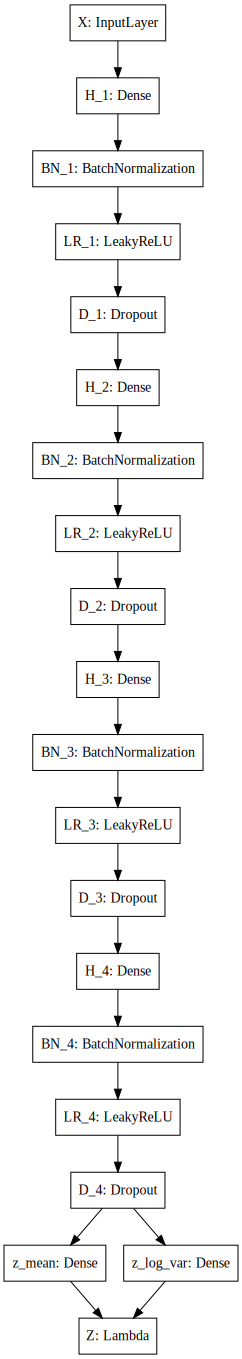

In [12]:
print("\nENCODER")
print("=======")
SVG(model_to_dot(model.encoder).create(prog='dot', format='svg'))


DECODER


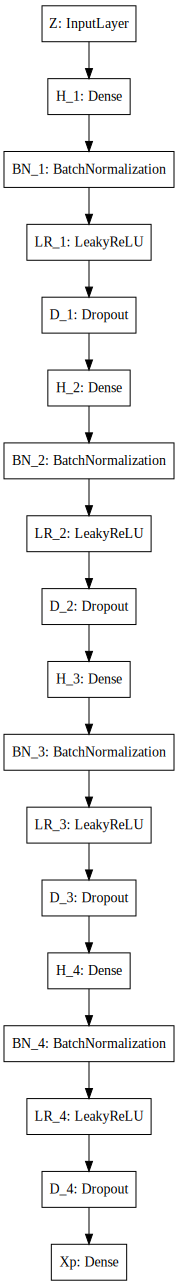

In [13]:
print("\nDECODER")
print("=======")
SVG(model_to_dot(model.decoder).create(prog='dot', format='svg'))


AUTOENCODER


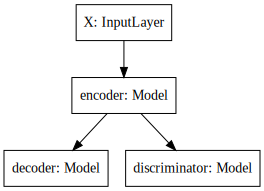

In [14]:
print("\nAUTOENCODER")
print("===========")
SVG(model_to_dot(model.autoencoder).create(prog='dot', format='svg'))


DISCRIMINATOR


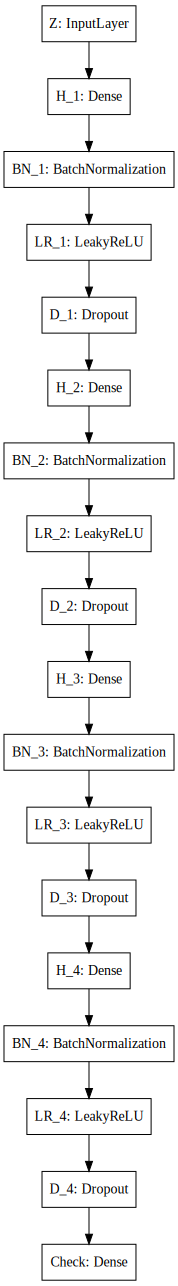

In [15]:
print("\nDISCRIMINATOR")
print("=============")
SVG(model_to_dot(model.discriminator).create(prog='dot', format='svg'))

### Train the model

Epoch 200/200, rec. loss: 1.204006, dis. loss: 0.791757


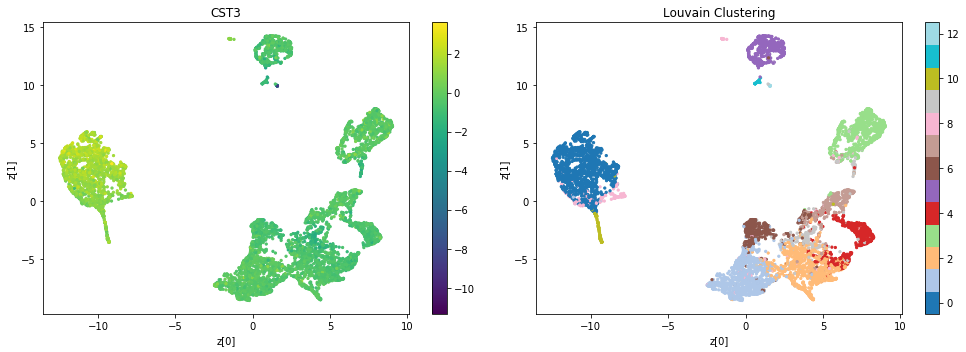

Training completed.
All networks exported in h5 format.
Latent space embedding completed.


In [15]:
# graph=True to show the data points in the 2-D latent space

log_dir = '../results/AAE1/PBMC10k/'
os.makedirs(log_dir, exist_ok=True)

GENE = 'CST3' # used only for training visualization 

rec_loss, dis_loss = model.train(graph=True, gene=GENE, log_dir=log_dir)

In [ ]:
!tensorboard --logdir=../results/AAE1/PBMC10k/

TensorBoard 1.13.1 at http://adm-120989-mac:6006 (Press CTRL+C to quit)
I0826 13:50:18.821258 123145318080512 _internal.py:122] ::1 - - [26/Aug/2019 13:50:18] "GET / HTTP/1.1" 200 -
I0826 13:50:24.287712 123145323335680 _internal.py:122] ::1 - - [26/Aug/2019 13:50:24] "GET /font-roboto/oMMgfZMQthOryQo9n22dcuvvDin1pK8aKteLpeZ5c0A.woff2 HTTP/1.1" 200 -
I0826 13:50:40.762235 123145318080512 _internal.py:122] ::1 - - [26/Aug/2019 13:50:40] "GET /tf-interactive-inference-dashboard/editedexample.png HTTP/1.1" 200 -
I0826 13:50:40.773851 123145333846016 _internal.py:122] ::1 - - [26/Aug/2019 13:50:40] "GET /tf-interactive-inference-dashboard/pdplots.png HTTP/1.1" 200 -
I0826 13:50:40.759183 123145323335680 _internal.py:122] ::1 - - [26/Aug/2019 13:50:40] "GET /tf-interactive-inference-dashboard/distance.png HTTP/1.1" 200 -
I0826 13:50:40.785651 123145328590848 _internal.py:122] ::1 - - [26/Aug/2019 13:50:40] "GET /tf-interactive-inference-dashboard/explorecounterfactuals.png HTTP/1.1" 200 -
I

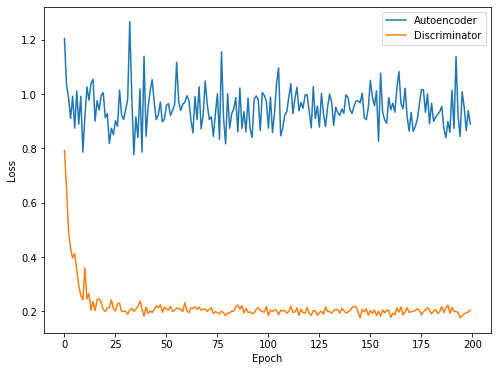

In [16]:
# Plot training loss values
steps = int(len(model.data)/model.batch_size)

plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(rec_loss[::steps])
plt.plot(dis_loss[::steps])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Autoencoder', 'Discriminator'], loc='upper right')
plt.show()

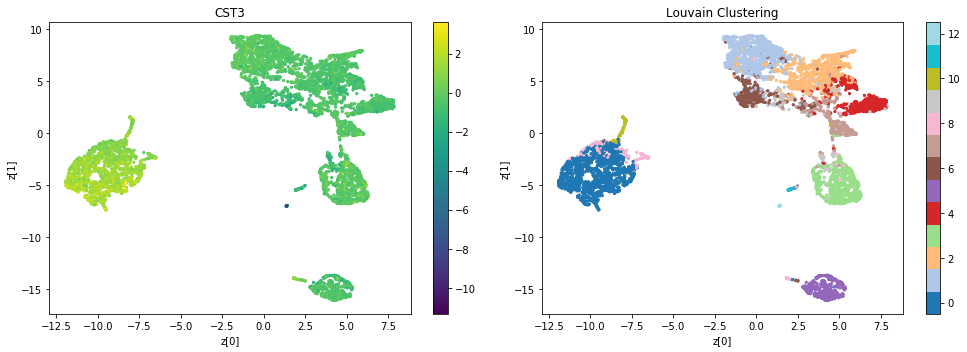

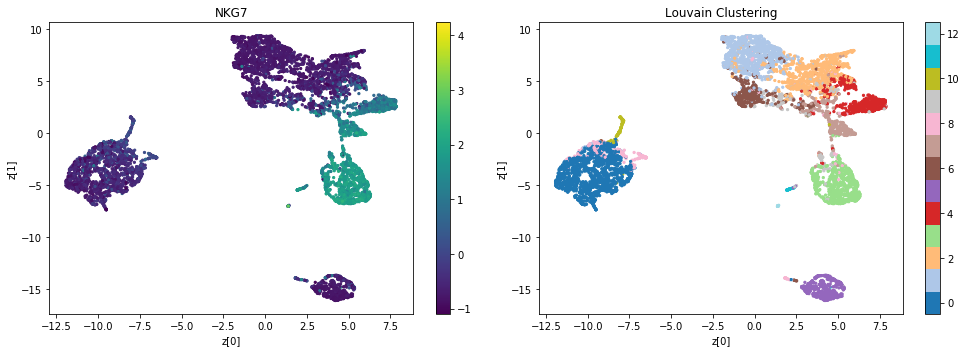

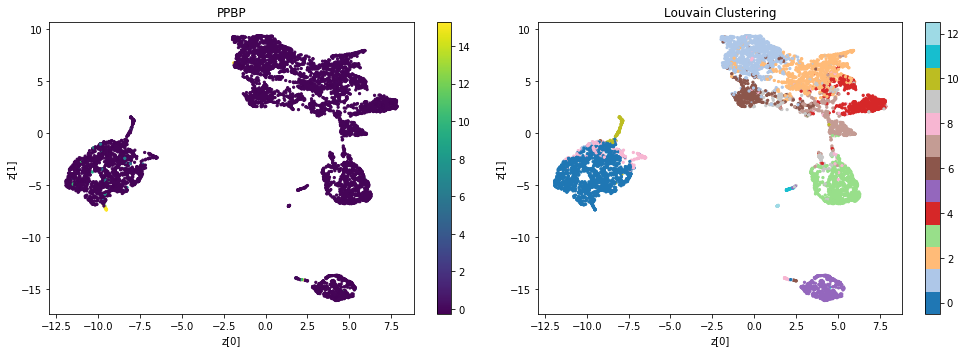

In [17]:
GENE_LIST = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)

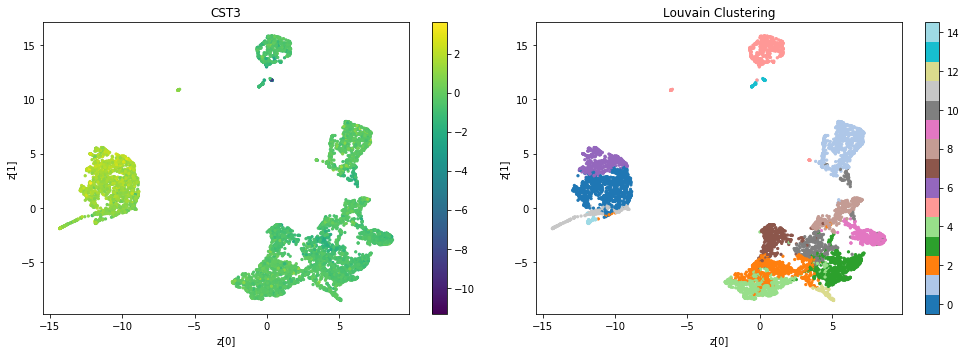

ARI = 0.5923401057914232
AMI = 0.6801229763934136


In [18]:
from keras.models import load_model
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

log_dir = '../results/AAE1/PBMC10k/'
model.encoder = load_model(log_dir + 'models/encoder.h5')

labels_true = model.labels

model.update_labels(res=0.6)
labels_pred = model.labels

GENE_LIST = ['CST3']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)

print("ARI = {}".format(adjusted_rand_score(labels_true, labels_pred)))
print("AMI = {}".format(adjusted_mutual_info_score(labels_true, labels_pred)))

## Unsupervised Adversarial Autoencoder: Setting Number of Clusters

### Build the model

In [6]:
# Network parameters
parameters = {
    'latent_dim': 10,
    'num_clusters': 18,
    'layers_enc_dim': [200, 100, 50, 30],
    'layers_dec_dim': [30, 50, 100, 200],
    'layers_dis_dim': [200, 100, 50, 30],
    'layers_dis_cat_dim': [200, 100, 50, 30],
    'batch_size': 35,
    'epochs': 200,
    'tau': 0.05 # temperature parameter
}

In [7]:
model = AAE2(**parameters)

In [8]:
# Import dataset

data_path = '../data/proc/pbmc10k.h5ad'

model.load_data(data_path)

Dataset imported.


In [9]:
# Rescale gene expression data

model.rescale_data()

Dataset rescaled.


In [10]:
# Build the full model

model.build_model()

In [11]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


,Value,Description
batch_size,35,batch size
epochs,200,number of epochs
alpha,0.1,alpha coeff. in activation function
do_rate,0.1,dropout rate
kernel_initializer,glorot_uniform,kernel initializer of all dense layers
bias_initializer,zeros,bias initializer of all dense layers
l2_weight,None,weight of l2 kernel regularization
l1_weight,None,weight of l1 activity regularization
latent_dim,10,dimension of latent space Z
layer_1_enc_dim,200,dimension of encoder dense layer 1


In [12]:
# Model summary

model.get_summary()


Encoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1789)         0                                            
__________________________________________________________________________________________________
H_1 (Dense)                     (None, 200)          358000      X[0][0]                          
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 200)          800         H_1[0][0]                        
__________________________________________________________________________________________________
LR_1 (LeakyReLU)                (None, 200)          0           BN_1[0][0]                       
____________________________________________________________________________________________

__________________________________________________________________________________________________
H_3 (Dense)                     (None, 100)          5100        D_2[0][0]                        
__________________________________________________________________________________________________
BN_3 (BatchNormalization)       (None, 100)          400         H_3[0][0]                        
__________________________________________________________________________________________________
LR_3 (LeakyReLU)                (None, 100)          0           BN_3[0][0]                       
__________________________________________________________________________________________________
D_3 (Dropout)                   (None, 100)          0           LR_3[0][0]                       
__________________________________________________________________________________________________
H_4 (Dense)                     (None, 200)          20200       D_3[0][0]                        
__________

_________________________________________________________________
BN_4 (BatchNormalization)    (None, 30)                120       
_________________________________________________________________
LR_4 (LeakyReLU)             (None, 30)                0         
_________________________________________________________________
D_4 (Dropout)                (None, 30)                0         
_________________________________________________________________
Check (Dense)                (None, 1)                 31        
Total params: 32,031
Trainable params: 31,271
Non-trainable params: 760
_________________________________________________________________


In [13]:
# Export model graphs

log_dir = '../results/AAE2/PBMC10k/'
os.makedirs('../results/AAE2/PBMC10k/graphs', exist_ok=True)
model.export_graph('../results/AAE2/PBMC10k/graphs')

Model graphs saved.



### Visualize graphs


ENCODER


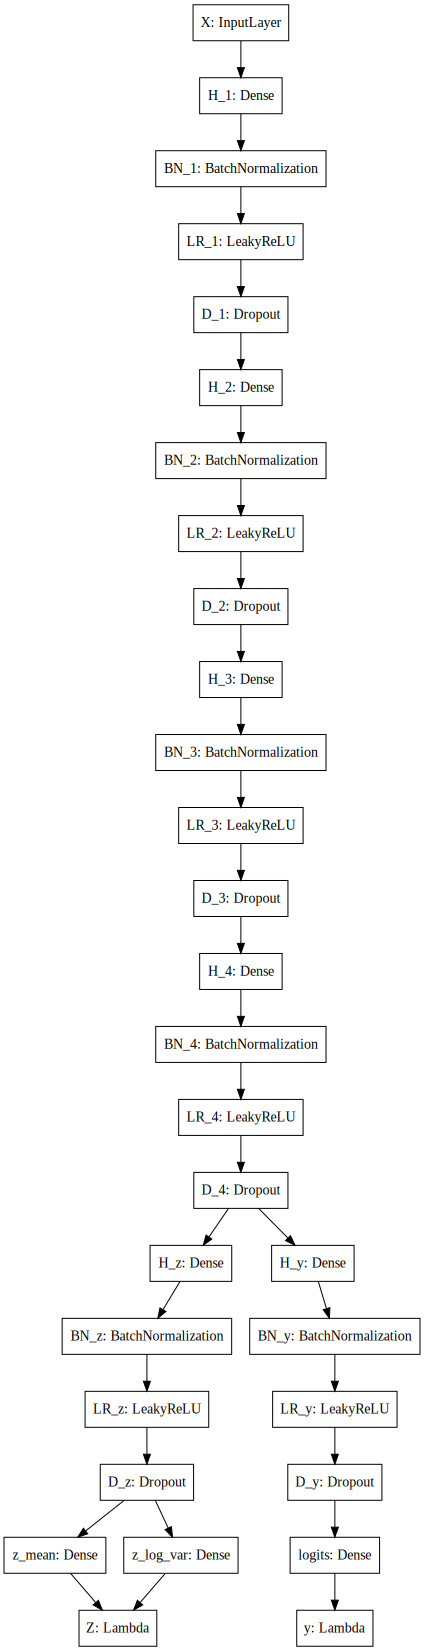

In [12]:
print("\nENCODER")
print("=======")
SVG(model_to_dot(model.encoder).create(prog='dot', format='svg'))


DECODER


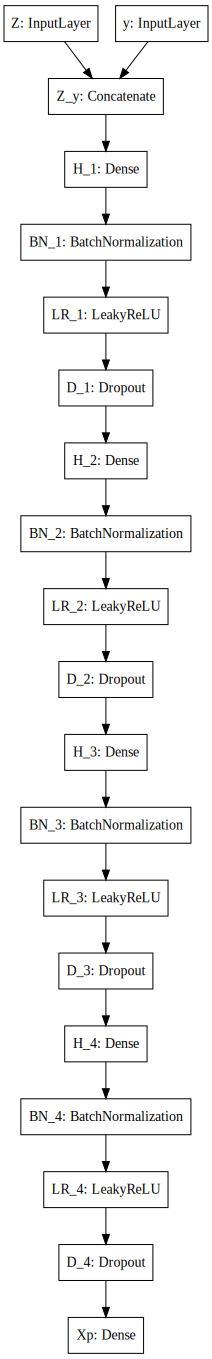

In [13]:
print("\nDECODER")
print("=======")
SVG(model_to_dot(model.decoder).create(prog='dot', format='svg'))


AUTOENCODER


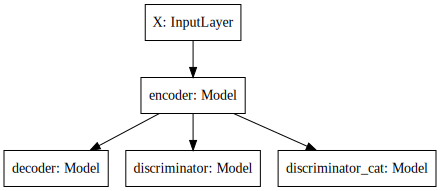

In [14]:
print("\nAUTOENCODER")
print("===========")
SVG(model_to_dot(model.autoencoder).create(prog='dot', format='svg'))


DISCRIMINATOR


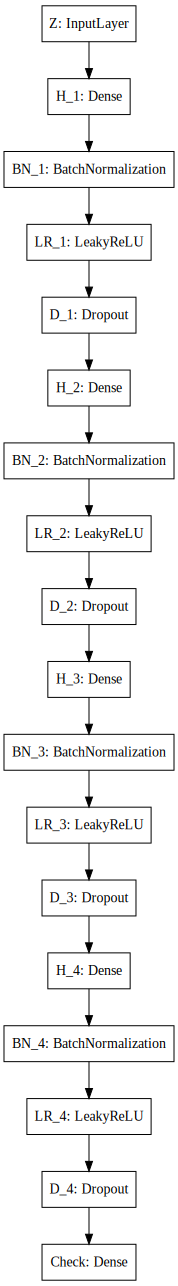

In [15]:
print("\nDISCRIMINATOR")
print("=============")
SVG(model_to_dot(model.discriminator).create(prog='dot', format='svg'))


CATEGORICAL DISCRIMINATOR


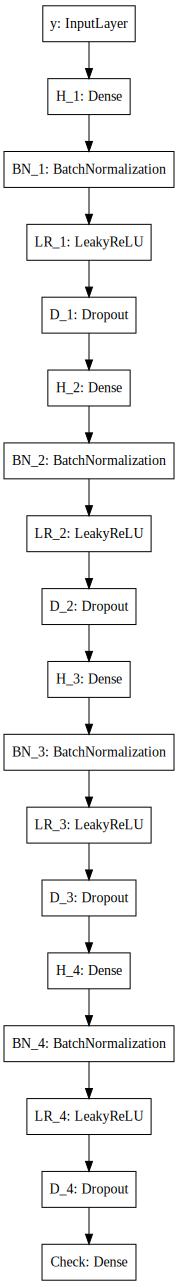

In [16]:
print("\nCATEGORICAL DISCRIMINATOR")
print("=========================")
SVG(model_to_dot(model.discriminator_cat).create(prog='dot', format='svg'))

### Train the model


Epoch 200/200, rec. loss: 1.327428, dis. loss: 0.907926, cat. dis. loss: 0.704799


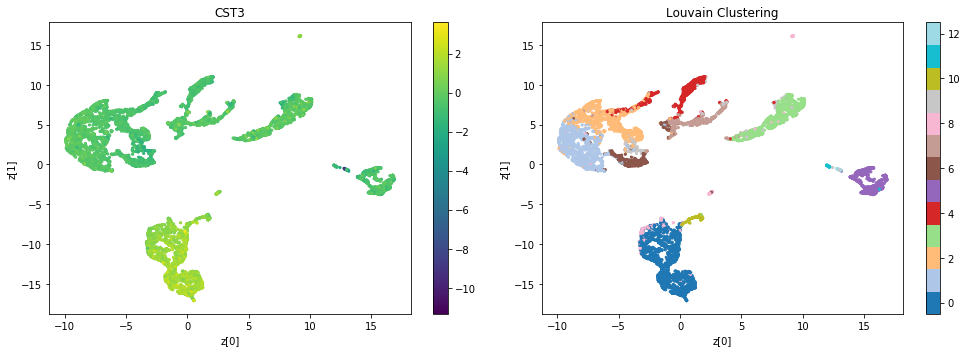

Training completed.
All networks exported in h5 format.
Latent space embedding completed.


In [14]:
# graph=True to show the data points in the 2-D latent space

log_dir = '../results/AAE2/PBMC10k/'
os.makedirs(log_dir, exist_ok=True)

GENE = 'CST3' # used only for training visualization 

rec_loss, dis_loss, dis_cat_loss = model.train(graph=True, gene=GENE, log_dir=log_dir)

In [ ]:
#!tensorboard --logdir=../results/AAE5/PBMC10k/

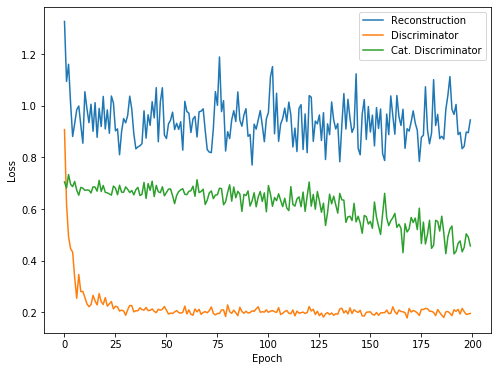

In [15]:
# Plot training loss values
steps = int(len(model.data)/model.batch_size)


plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(rec_loss[::steps])
plt.plot(dis_loss[::steps])
plt.plot(dis_cat_loss[::steps])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Reconstruction', 'Discriminator', 'Cat. Discriminator'], 
           loc='upper right')
plt.show()

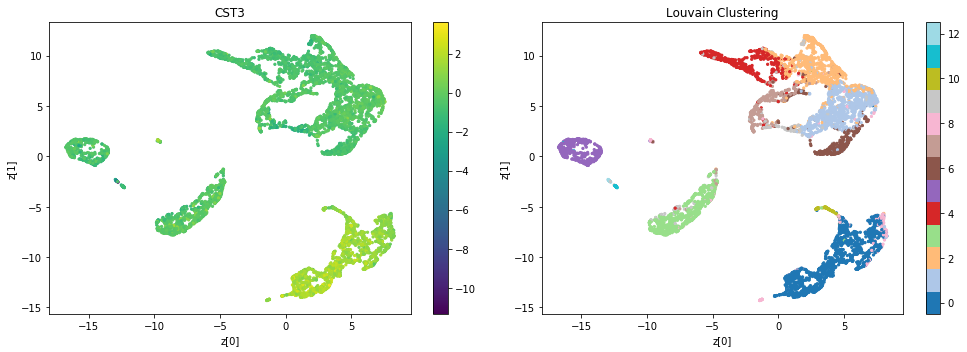

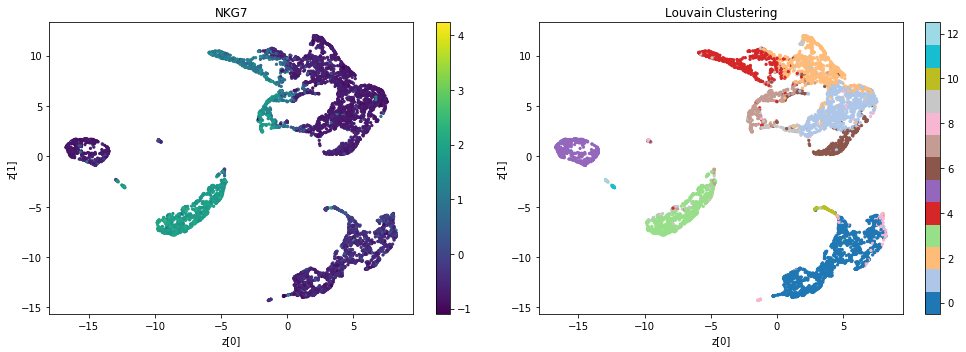

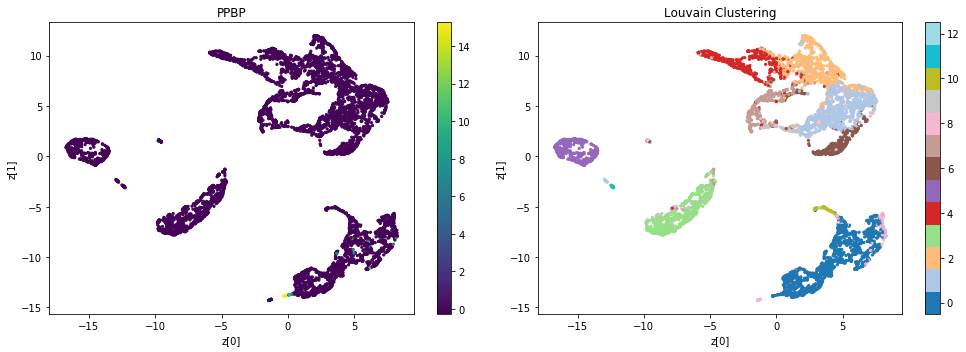

In [16]:
GENE_LIST = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)

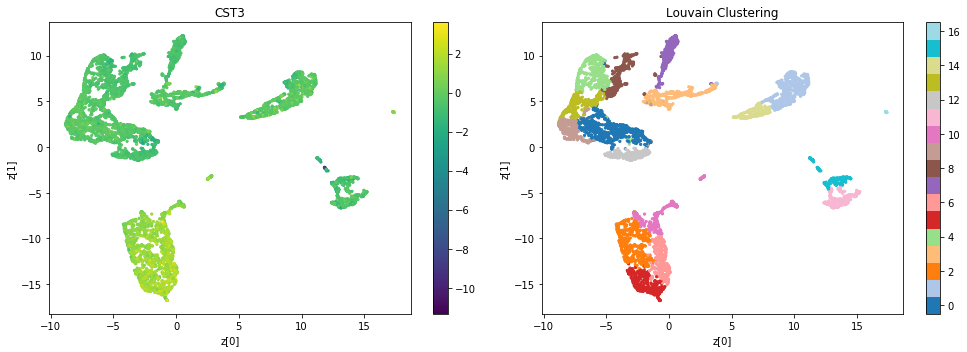

ARI = 0.4819383594641788
AMI = 0.6264953694189789


In [17]:
from keras.models import load_model
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

log_dir = '../results/AAE2/PBMC10k/'
model.encoder = load_model(log_dir + 'models/encoder.h5')

labels_true = model.labels

model.update_labels(res=0.6)
labels_pred = model.labels

GENE_LIST = ['CST3']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)

print("ARI = {}".format(adjusted_rand_score(labels_true, labels_pred)))
print("AMI = {}".format(adjusted_mutual_info_score(labels_true, labels_pred)))

## Variational Autoencoder

<img src="img/variational_autoencoder_model.png" width="800px" style="float:center">

### Build the model

In [4]:
# Network parameters
parameters = {
    'latent_dim': 10,
    'layers_enc_dim': [200, 100, 50, 30],
    'layers_dec_dim': [30, 50, 100, 200],
    'batch_size': 35,
    'epochs': 500 
}

In [5]:
model = VAE(**parameters)

In [6]:
# Import dataset

data_path = '../data/proc/pbmc10k.h5ad'

model.load_data(data_path)

Dataset imported.


In [7]:
# Rescale gene expression data

model.rescale_data()

Dataset rescaled.


In [8]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


,Value,Description
batch_size,35,batch size
epochs,500,number of epochs
alpha,0.1,alpha coeff. in activation function
do_rate,0.1,dropout rate
kernel_initializer,glorot_uniform,kernel initializer of all dense layers
bias_initializer,zeros,bias initializer of all dense layers
l2_weight,None,weight of l2 kernel regularization
l1_weight,None,weight of l1 activity regularization
latent_dim,10,dimension of latent space Z
layer_1_enc_dim,200,dimension of encoder dense layer 1


In [8]:
# Build the full model

model.build_model()

In [10]:
# Model summary

model.get_summary()


Encoder Network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1789)         0                                            
__________________________________________________________________________________________________
H_1 (Dense)                     (None, 200)          358000      X[0][0]                          
__________________________________________________________________________________________________
BN_1 (BatchNormalization)       (None, 200)          800         H_1[0][0]                        
__________________________________________________________________________________________________
LR_1 (LeakyReLU)                (None, 200)          0           BN_1[0][0]                       
____________________________________________________________________________________________

In [11]:
# Export model graphs

log_dir = '../results/VAE/PBMC10k/'
os.makedirs('../results/VAE/PBMC10k/graphs', exist_ok=True)
model.export_graph('../results/VAE/PBMC10k/graphs')

Model graphs saved.



### Visualize graphs


ENCODER


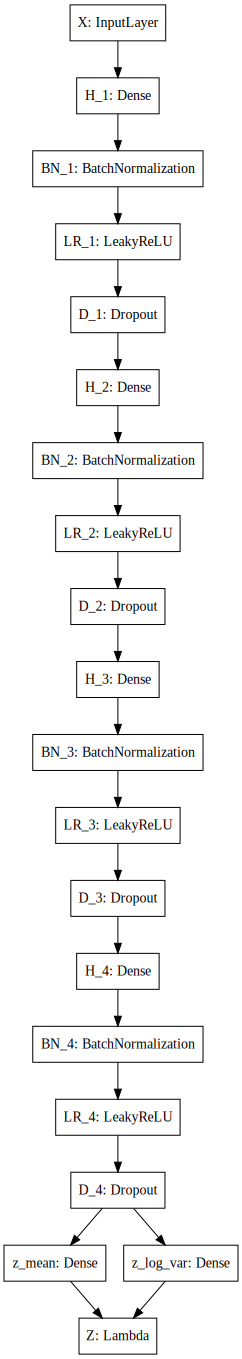

In [12]:
print("\nENCODER")
print("=======")
SVG(model_to_dot(model.encoder).create(prog='dot', format='svg'))


DECODER


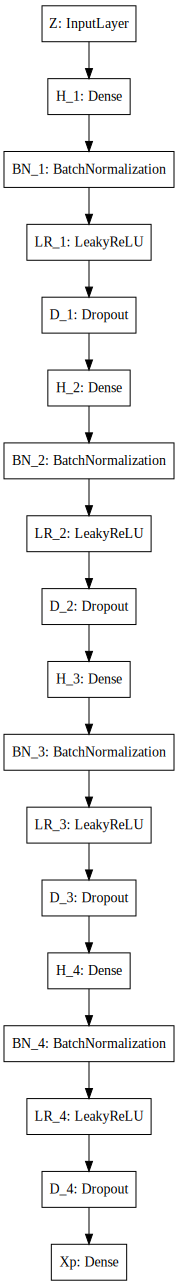

In [13]:
print("\nDECODER")
print("=======")
SVG(model_to_dot(model.decoder).create(prog='dot', format='svg'))


AUTOENCODER


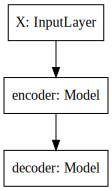

In [14]:
print("\nAUTOENCODER")
print("===========")
SVG(model_to_dot(model.autoencoder).create(prog='dot', format='svg'))

### Train the model

In [15]:
# Training...

log_dir = '../results/VAE/PBMC10k/'
os.makedirs(log_dir, exist_ok=True)

loss, val_loss = model.train(val_split=0.2, log_dir=log_dir)

Start model training...
Train on 6000 samples, validate on 1500 samples
Epoch 1/500
6000/6000 [==============================] - 4s 667us/step - loss: 1980.6280 - val_loss: 1925.2032
Epoch 2/500
6000/6000 [==============================] - 2s 363us/step - loss: 1815.6131 - val_loss: 1844.2170
Epoch 3/500
6000/6000 [==============================] - 2s 378us/step - loss: 1774.4269 - val_loss: 1794.0268
Epoch 4/500
6000/6000 [==============================] - 2s 359us/step - loss: 1744.5740 - val_loss: 1770.6471
Epoch 5/500
6000/6000 [==============================] - 2s 347us/step - loss: 1730.2049 - val_loss: 1765.2517
Epoch 6/500
6000/6000 [==============================] - 2s 386us/step - loss: 1724.2083 - val_loss: 1761.3902
Epoch 7/500
6000/6000 [==============================] - 2s 356us/step - loss: 1719.9352 - val_loss: 1755.6053
Epoch 8/500
6000/6000 [==============================] - 2s 394us/step - loss: 1711.1206 - val_loss: 1740.0651
Epoch 9/500
6000/6000 [=================

6000/6000 [==============================] - 2s 335us/step - loss: 1670.3291 - val_loss: 1708.3954
Epoch 74/500
6000/6000 [==============================] - 2s 321us/step - loss: 1669.8668 - val_loss: 1708.5372
Epoch 75/500
6000/6000 [==============================] - 2s 328us/step - loss: 1669.9480 - val_loss: 1708.4347
Epoch 76/500
6000/6000 [==============================] - 2s 350us/step - loss: 1669.4392 - val_loss: 1708.0187
Epoch 77/500
6000/6000 [==============================] - 2s 341us/step - loss: 1669.3371 - val_loss: 1707.8788
Epoch 78/500
6000/6000 [==============================] - 2s 324us/step - loss: 1669.1293 - val_loss: 1707.4633
Epoch 79/500
6000/6000 [==============================] - 2s 332us/step - loss: 1669.4538 - val_loss: 1707.4931
Epoch 80/500
6000/6000 [==============================] - 2s 337us/step - loss: 1668.8440 - val_loss: 1707.6315
Epoch 81/500
6000/6000 [==============================] - 2s 333us/step - loss: 1668.6594 - val_loss: 1707.3226
Epoch

Epoch 146/500
6000/6000 [==============================] - 2s 329us/step - loss: 1662.2813 - val_loss: 1703.4087
Epoch 147/500
6000/6000 [==============================] - 2s 338us/step - loss: 1662.2762 - val_loss: 1703.2799
Epoch 148/500
6000/6000 [==============================] - 2s 336us/step - loss: 1662.0996 - val_loss: 1703.3036
Epoch 149/500
6000/6000 [==============================] - 2s 412us/step - loss: 1662.1644 - val_loss: 1703.2730
Epoch 150/500
6000/6000 [==============================] - 2s 380us/step - loss: 1661.9906 - val_loss: 1703.3569
Epoch 151/500
6000/6000 [==============================] - 2s 380us/step - loss: 1661.7197 - val_loss: 1703.3615
Epoch 152/500
6000/6000 [==============================] - 2s 400us/step - loss: 1661.9294 - val_loss: 1703.3945
Epoch 153/500
6000/6000 [==============================] - 2s 390us/step - loss: 1661.9349 - val_loss: 1703.2178
Epoch 154/500
6000/6000 [==============================] - 2s 379us/step - loss: 1661.7115 - val

6000/6000 [==============================] - 2s 358us/step - loss: 1658.3163 - val_loss: 1701.9615
Epoch 219/500
6000/6000 [==============================] - 2s 365us/step - loss: 1657.6269 - val_loss: 1701.9012
Epoch 220/500
6000/6000 [==============================] - 2s 355us/step - loss: 1657.6856 - val_loss: 1701.7522
Epoch 221/500
6000/6000 [==============================] - 2s 362us/step - loss: 1657.8476 - val_loss: 1701.6235
Epoch 222/500
6000/6000 [==============================] - 2s 352us/step - loss: 1657.7202 - val_loss: 1701.8294
Epoch 223/500
6000/6000 [==============================] - 2s 351us/step - loss: 1657.9026 - val_loss: 1701.8448
Epoch 224/500
6000/6000 [==============================] - 2s 355us/step - loss: 1657.5468 - val_loss: 1701.7214
Epoch 225/500
6000/6000 [==============================] - 2s 360us/step - loss: 1657.3997 - val_loss: 1701.4769
Epoch 226/500
6000/6000 [==============================] - 2s 365us/step - loss: 1657.5909 - val_loss: 1701.55

6000/6000 [==============================] - 2s 407us/step - loss: 1654.5047 - val_loss: 1701.4523
Epoch 291/500
6000/6000 [==============================] - 2s 354us/step - loss: 1655.2178 - val_loss: 1701.6914
Epoch 292/500
6000/6000 [==============================] - 2s 413us/step - loss: 1655.0523 - val_loss: 1701.3278
Epoch 293/500
6000/6000 [==============================] - 2s 396us/step - loss: 1654.9988 - val_loss: 1701.3979
Epoch 294/500
6000/6000 [==============================] - 2s 388us/step - loss: 1655.0465 - val_loss: 1701.2194
Epoch 295/500
6000/6000 [==============================] - 2s 378us/step - loss: 1654.8582 - val_loss: 1701.3604
Epoch 296/500
6000/6000 [==============================] - 2s 357us/step - loss: 1654.7874 - val_loss: 1701.4947
Epoch 297/500
6000/6000 [==============================] - 2s 358us/step - loss: 1654.7895 - val_loss: 1701.1540
Epoch 298/500
6000/6000 [==============================] - 2s 366us/step - loss: 1655.0925 - val_loss: 1701.27

In [ ]:
# !tensorboard --logdir=../results/VAE/PBMC10k/

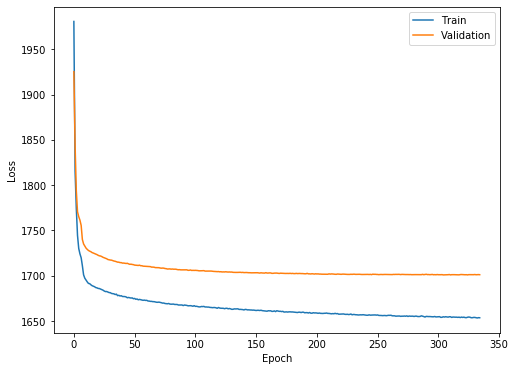

In [18]:
# Plot training & validation loss values

plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

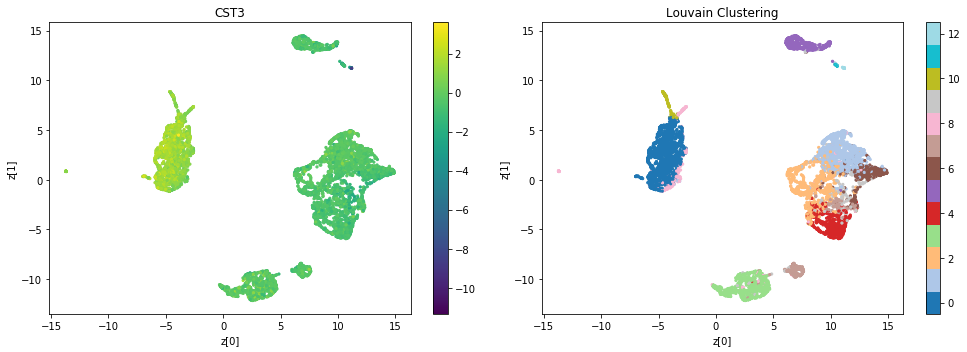

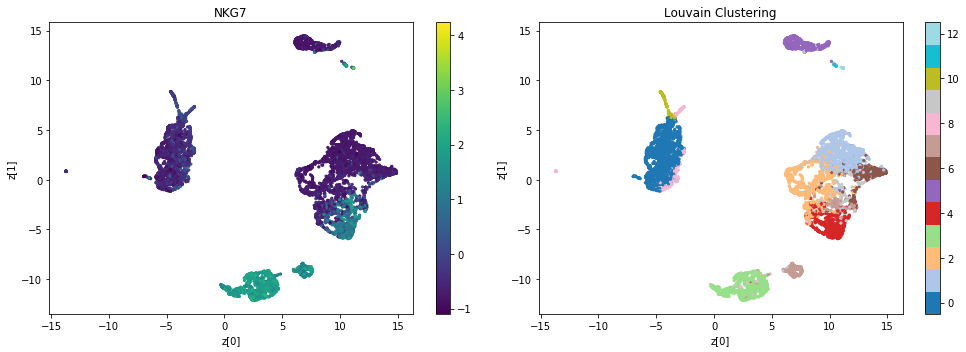

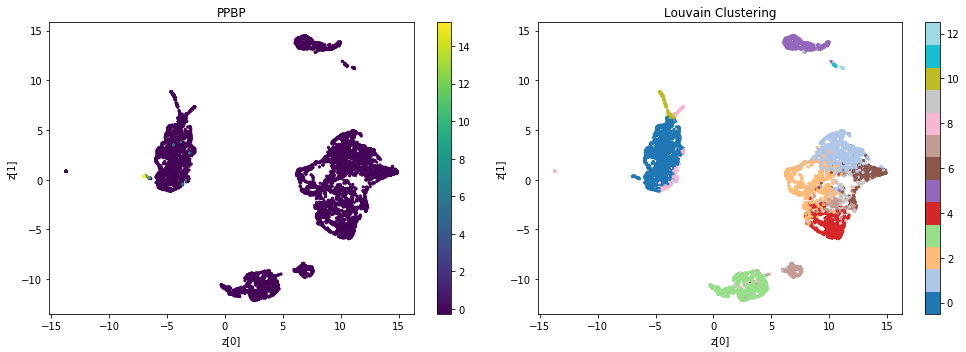

In [19]:
gene_list = ['CST3', 'NKG7', 'PPBP']
model.plot_umap(gene_selected=gene_list, louvain=True)

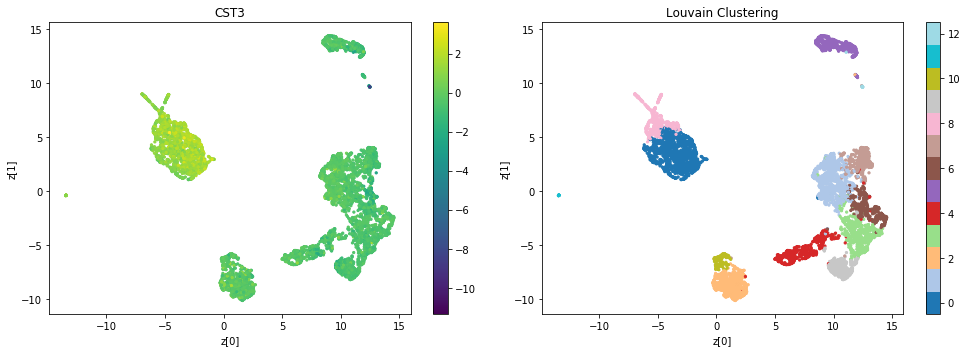

In [15]:
from keras.models import load_model

log_dir = '../results/VAE/PBMC10k/'
model.encoder = load_model(log_dir + 'models/encoder.h5')

model.update_labels(res=0.6)

GENE_LIST = ['CST3']
model.plot_umap(gene_selected=GENE_LIST, louvain=True)